In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("./sample_data/Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
print(df.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # too many missing

/tmp/ipython-input-19-614224173.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


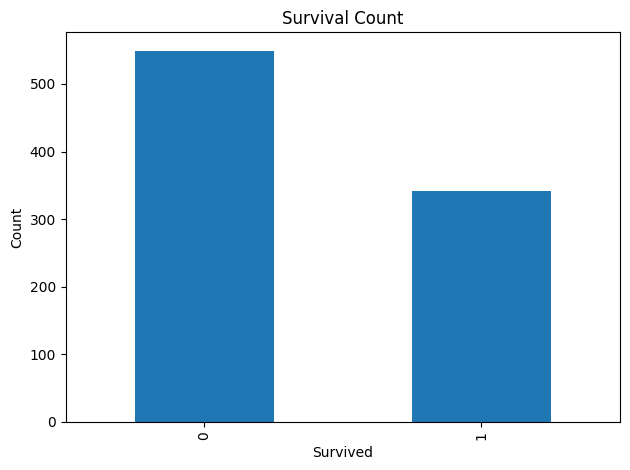

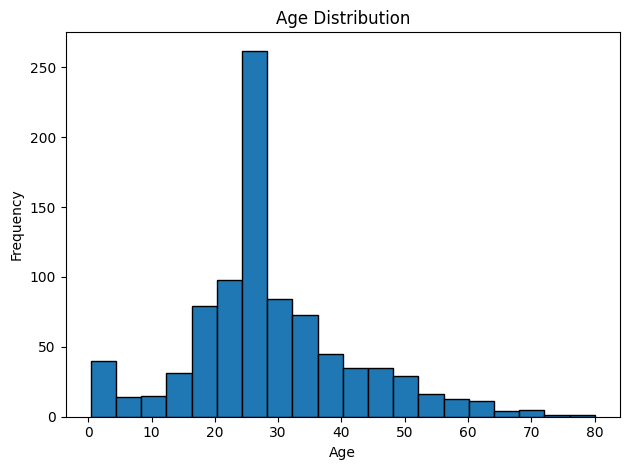

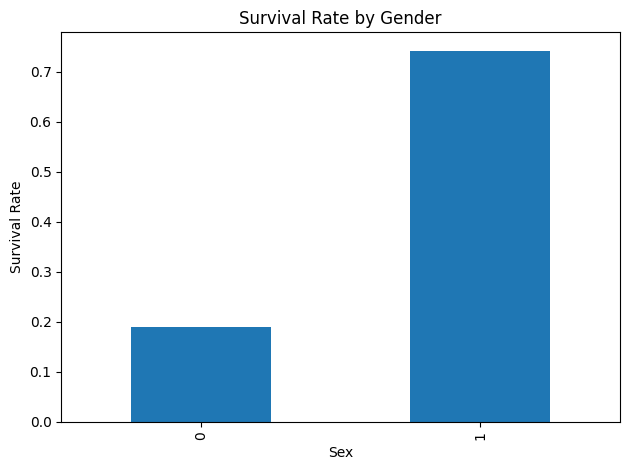

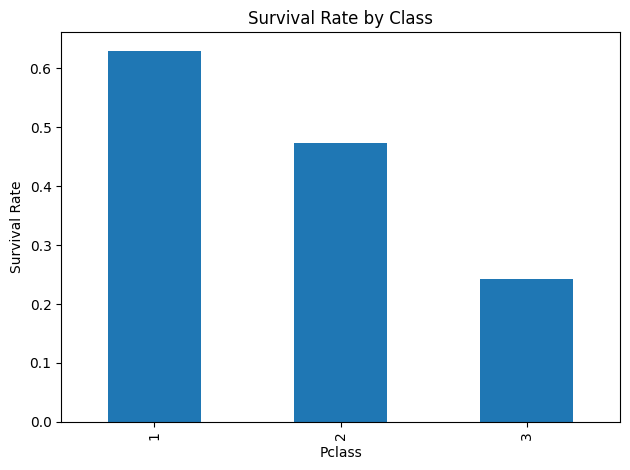

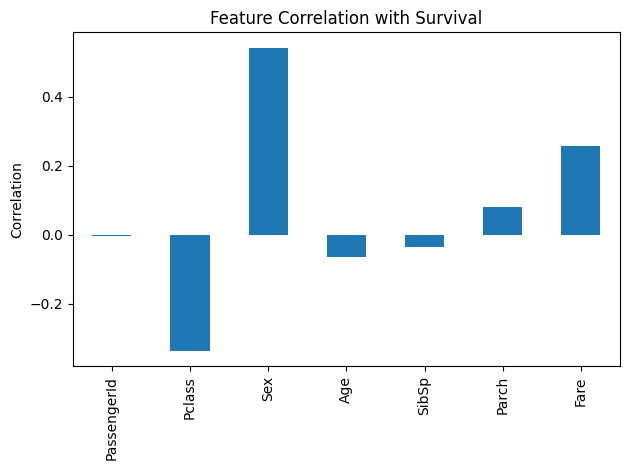

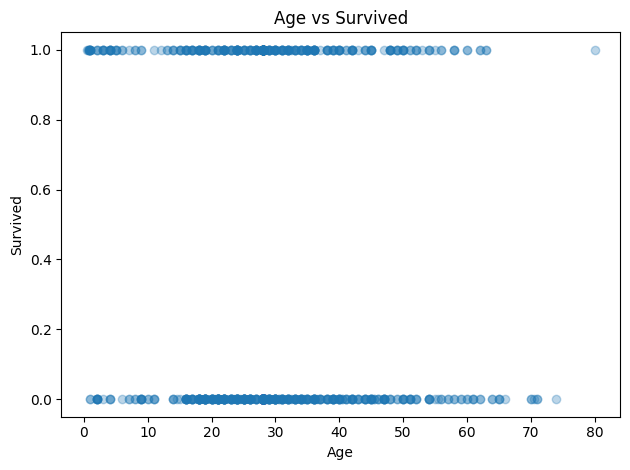

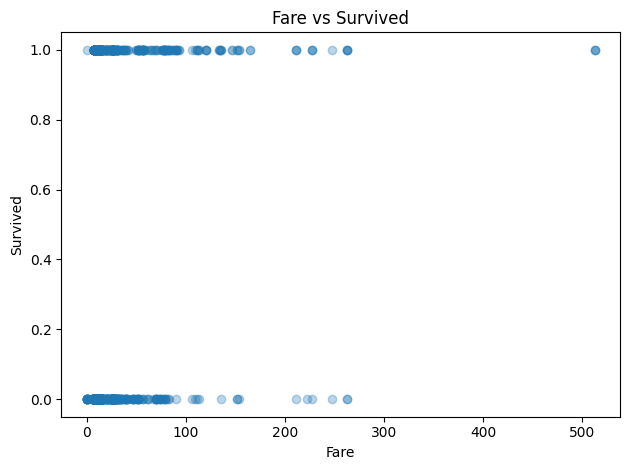

In [ ]:
# 📌 Survival Count
df['Survived'].value_counts().plot(kind='bar', title='Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('survival_count.png')
plt.show()

# 📌 Age Distribution
df['Age'].plot(kind='hist', bins=20, edgecolor='black', title='Age Distribution')
plt.xlabel('Age')
plt.tight_layout()
plt.savefig('age_distribution.png')
plt.show()

# 📌 Survival Rate by Gender
gender_survival = df.groupby('Sex')['Survived'].mean()
gender_survival.plot(kind='bar', title='Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.savefig('survival_by_gender.png')
plt.show()

# 📌 Survival Rate by Class
class_survival = df.groupby('Pclass')['Survived'].mean()
class_survival.plot(kind='bar', title='Survival Rate by Class')
plt.ylabel('Survival Rate')
plt.tight_layout()
plt.savefig('survival_by_class.png')
plt.show()

# 📌 Correlation with Survival
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()['Survived'].drop('Survived')
correlation.plot(kind='bar', title='Feature Correlation with Survival')
plt.ylabel('Correlation')
plt.tight_layout()
plt.savefig('correlation_with_survival.png')
plt.show()

# 📌 Age vs Survived (Scatter Plot)
plt.scatter(df['Age'], df['Survived'], alpha=0.3)
plt.title('Age vs Survived')
plt.xlabel('Age')
plt.ylabel('Survived')
plt.tight_layout()
plt.savefig('age_vs_survived.png')
plt.show()

# 📌 Fare vs Survived (Scatter Plot)
plt.scatter(df['Fare'], df['Survived'], alpha=0.3)
plt.title('Fare vs Survived')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.tight_layout()
plt.savefig('fare_vs_survived.png')
plt.show()


In [ ]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("Survival rate by Pclass:")
print(df.groupby('Pclass')['Survived'].mean())

print("\nSurvival rate by Sex:")
print(df.groupby('Sex')['Survived'].mean())


Survival rate by Pclass:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Survival rate by Sex:
Sex
0    0.188908
1    0.742038
Name: Survived, dtype: float64
